In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
PATH_TO_STORE_TRAINSET = './data/train'
PATH_TO_STORE_TESTSET = './data/test'

In [3]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,7), ncols=2)
    ax1.imshow(img.numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10).astype(int), size='large');
    ax2.set_title('Digit Probability')
    ax2.set_xlim(0, 1.1)

In [5]:
trainset = torchvision.datasets.MNIST(
    PATH_TO_STORE_TRAINSET, download=True, train=True, transform=transforms.ToTensor()
);
valset = torchvision.datasets.MNIST(
    PATH_TO_STORE_TESTSET, download=True, train=False, transform=transforms.ToTensor()
);

In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, drop_last=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True, drop_last=True)

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


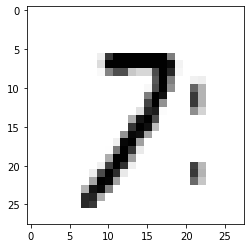

In [8]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

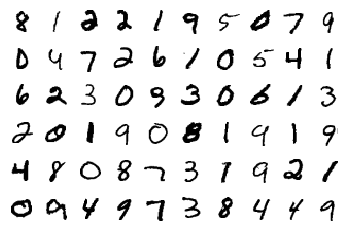

In [9]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [10]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [11]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.9438850220554927

Training Time (in minutes) = 0.10144400596618652
Epoch 1 - Training loss: 0.33431479553265103

Training Time (in minutes) = 0.19849286476771036
Epoch 2 - Training loss: 0.2719658203105301

Training Time (in minutes) = 0.2966732303301493
Epoch 3 - Training loss: 0.2302904754344906

Training Time (in minutes) = 0.3943486134211222
Epoch 4 - Training loss: 0.1983805298050647

Training Time (in minutes) = 0.49267839193344115
Epoch 5 - Training loss: 0.17308056958988785

Training Time (in minutes) = 0.5904645085334778
Epoch 6 - Training loss: 0.15282249668720307

Training Time (in minutes) = 0.6892894705136617
Epoch 7 - Training loss: 0.13568172507734697

Training Time (in minutes) = 0.7871470252672831
Epoch 8 - Training loss: 0.12186176868787071

Training Time (in minutes) = 0.8860011219978332
Epoch 9 - Training loss: 0.11005133392015246

Training Time (in minutes) = 0.9845128575960795
Epoch 10 - Training loss: 0.09994335206491607

Training Time 

Predicted Digit = 2


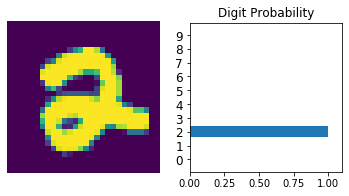

In [13]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [14]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9722


In [15]:
torch.save(model, './data/my_mnist_model.pt')